## Challenge 1: Measure and plot an f-I curve

- The relationship between input current (I) and output firing rate (f)
- Make sure to only count spikes within the window of the step current injection

## Challenge 2: Simultaneously optimize both somatic input resistance and the slope of the f-I curve.

- Hint: x0 = [gl0, gnabar0, gkbar0]
- How to construct a single error value that reflects 2 objectives?
- Target f-I slope should be ~10 Hz / 0.05 nA
- f-I slope should really only be calculated from values of I that produced more than one spike. ___/

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from neuron import h

## Challenge 1: 

In [2]:
h.load_file('stdrun.hoc')

1.0

In [3]:
soma = h.Section()
soma.L = 20.
soma.diam = 20.
soma.insert('hh')

h.tstop = 600.
v_init = -65.
h.v_init = v_init

t = h.Vector()
soma_voltage = h.Vector()
t.record(h._ref_t, h.dt)  # record the time base
soma_voltage.record(soma(0.5)._ref_v, h.dt)  # record the voltage across the membrane in a segment

step_current_stim = h.IClamp(soma(0.5))
step_current_stim.amp = 0.15  # amplitude in nanoAmps
step_current_stim.dur = 200.  # duration in milliseconds
step_current_stim.delay = 200.  # start time of current injection
h.run()

0.0

In [4]:
'''#output firing rate = Spike_counts/ms - time constant
h.run()
plt.figure()
plt.plot(t, soma_voltage)
plt.ylabel('Voltage (mV)')
plt.xlabel('Time (ms)')
#smaller current injection might cause all to be same height'''

"#output firing rate = Spike_counts/ms - time constant\nh.run()\nplt.figure()\nplt.plot(t, soma_voltage)\nplt.ylabel('Voltage (mV)')\nplt.xlabel('Time (ms)')\n#smaller current injection might cause all to be same height"

In [5]:
hh_mech = soma(0.5).hh
#now think of hh attributes in time scales
gl = h.Vector()
gl.record(soma(0.5).hh._ref_gl, h.dt)
gna = h.Vector()
gna.record(soma(0.5).hh._ref_gna, h.dt)
gk = h.Vector()
gk.record(soma(0.5).hh._ref_gk, h.dt)

Vector[4]

In [6]:
gkbar0 = soma(0.5).hh.gkbar
gnabar0 = soma(0.5).hh.gnabar
gl0 = soma(0.5).hh.gl
T0 = h.celsius

In [7]:
spike_times = h.Vector()
spike_detector = h.NetCon(soma(0.5)._ref_v, None, sec=soma)
spike_detector.delay = 0.  # ms
spike_detector.threshold = -10.  # mV
spike_detector.record(spike_times)

0.0

In [8]:
'''step_current_stim.amp = 0.5
test_amp_vals = [0.05 * i for i in range(6)]
fig, axes = plt.subplots(len(test_amp_vals))
for i, amp in enumerate(test_amp_vals):
    step_current_stim.amp = amp
    h.run()
    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))
    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))
    axes[i].legend(loc='best', frameon=False)
fig.show()'''

"step_current_stim.amp = 0.5\ntest_amp_vals = [0.05 * i for i in range(6)]\nfig, axes = plt.subplots(len(test_amp_vals))\nfor i, amp in enumerate(test_amp_vals):\n    step_current_stim.amp = amp\n    h.run()\n    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))\n    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))\n    axes[i].legend(loc='best', frameon=False)\nfig.show()"

In [39]:
step_current_stim.amp = 0.50
#test_amp_vals = [0.05 * i for i in range(10)]
#x = [0.00050 * i for i in range(1000)]
x = [0.050 * i for i in range(35)]
#x = [0.05]
#create a firing_rate list
firing_rate_list = []
#create a list for spike_times contained within a array that is being created from enumerating through a list of
#input x values or current inputs
spike_count_list = []
#pass in the values of current inputs as x
def calc_firing_rates(x):
    #enumerate throught these x values: for count(i), values(amp) in enumerate through x
     for i, amp in enumerate(x):
    #for i, amp in enumerate(test_amp_vals):
    #assign the .amp object to the amp value variable
        step_current_stim.amp = amp
        #needs to run to make the simulation happe
        h.run()
        #firing rate = the array of the length of the array of spike times - has to be the length because 
        #the spike times will tell u where a spike happens at what time point, so each time point, if it reaches
        #threshold it will become a spike, this is divided by the simulations current duration - which is the interval
        #where spikes will occur at because this is where current is being stimulated / 1000 (ms to s)
        firing_rate = np.array((len(np.array(spike_times))/(step_current_stim.dur/1000)))
        #must print within the function to output this value when you return the function
        print(firing_rate)
        #print(len(np.array(spike_times))) 
        #append the firing rate values to the firing rate list so u can have them stored
        firing_rate_list.append(float(firing_rate)) 
        #do the same for the spike time length or spikes
        spike_count_list.append(len(np.array(spike_times)))

In [40]:
len(x)

35

In [41]:
calc_firing_rates(x)

0.0
5.0
65.0
75.0
80.0
90.0
95.0
100.0
100.0
105.0
110.0
115.0
115.0
120.0
120.0
125.0
130.0
130.0
130.0
135.0
135.0
15.0
10.0
10.0
10.0
10.0
10.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0
5.0


In [42]:
len(firing_rate_list)

35

In [43]:
#len(firing_rate_list)

In [44]:
#spike_count_list

In [46]:
'''plt.plot(x, firing_rate_list) 
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Rate (Spikes/S)')
plt.title('F-I Curve')
#plt.savefig('F-I Curve.png')'''

"plt.plot(x, firing_rate_list) \nplt.xlabel('Input Current (nA)')\nplt.ylabel('Firing Rate (Spikes/S)')\nplt.title('F-I Curve')\n#plt.savefig('F-I Curve.png')"

In [47]:
'''step_current_stim.amp = 0.5
test_amp_vals = [0.05 * i for i in range(40)]
fig, axes = plt.subplots(len(test_amp_vals), figsize=(9., 80.))
for i, amp in enumerate(test_amp_vals):
    step_current_stim.amp = amp
    h.run()
    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))
    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))
    axes[i].legend(loc='best', frameon=False)
fig.show()'''

"step_current_stim.amp = 0.5\ntest_amp_vals = [0.05 * i for i in range(40)]\nfig, axes = plt.subplots(len(test_amp_vals), figsize=(9., 80.))\nfor i, amp in enumerate(test_amp_vals):\n    step_current_stim.amp = amp\n    h.run()\n    print('Amp: %.2f;\nspike times: %s' % (amp, str(np.array(spike_times))))\n    axes[i].plot(t, soma_voltage, label='Amp: %.2f;\nspike count: %i' % (amp, len(spike_times)))\n    axes[i].legend(loc='best', frameon=False)\nfig.show()"

## Challenge 2: 

In [48]:
from statistics import mean
#f-I slope should really only be calculated from values of I that produced more than one spike. ___/

In [49]:
#0.1 - 1.3 = x1[2:26] - produce more than one spike
x1 = x[2:27]

In [50]:
len(x1)

25

In [51]:
above_one_spike_list = []
for i in firing_rate_list:
        if i > 5:
            above_one_spike = i 
            #print(above_one_spike)
            above_one_spike_list.append(above_one_spike)

In [52]:
above_one_spike_list

[65.0,
 75.0,
 80.0,
 90.0,
 95.0,
 100.0,
 100.0,
 105.0,
 110.0,
 115.0,
 115.0,
 120.0,
 120.0,
 125.0,
 130.0,
 130.0,
 130.0,
 135.0,
 135.0,
 15.0,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0]

<IPython.core.display.Javascript object>


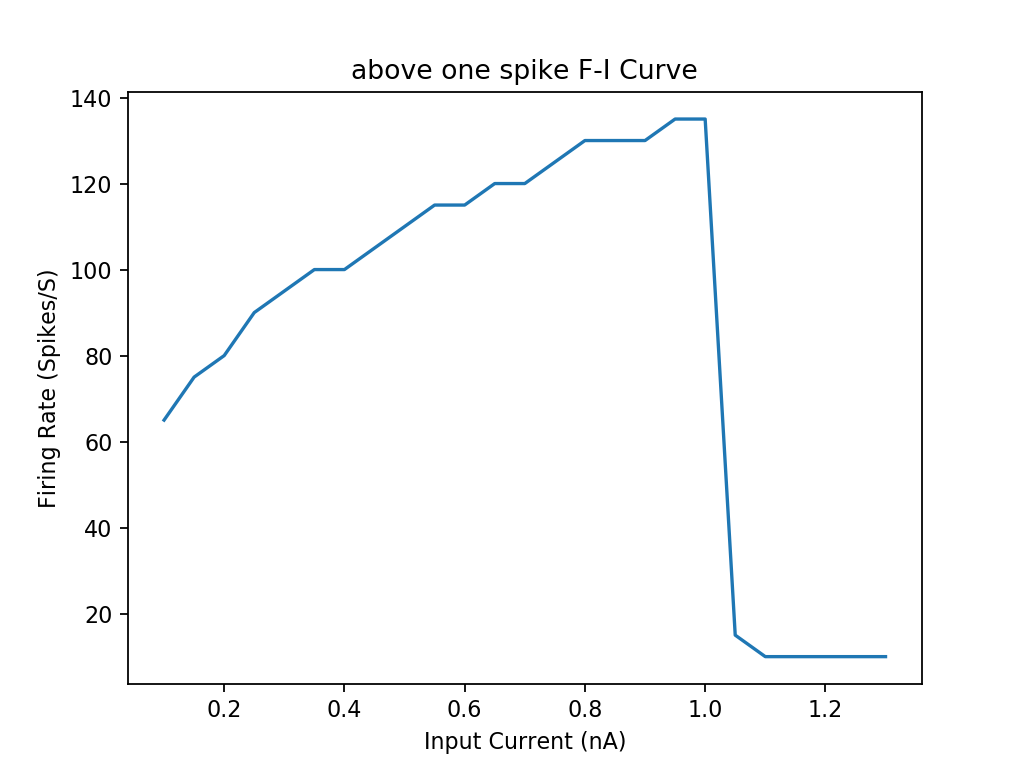

Text(0.5, 1.0, 'above one spike F-I Curve')

In [53]:
plt.plot(x1, above_one_spike_list) 
plt.xlabel('Input Current (nA)')
plt.ylabel('Firing Rate (Spikes/S)')
plt.title('above one spike F-I Curve')

In [54]:
Slope_firing_rate = [i / j for i, j in zip(above_one_spike_list, x1)] 
Slope_firing_rate = mean(Slope_firing_rate)

In [55]:
Slope_firing_rate

197.29085139326355

In [23]:
'''xs = np.array(x1, dtype=np.float64)
ys = np.array(above_one_spike_list, dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)'''

-54.61538461538463


In [24]:
#slope = np.polyfit(x1, above_one_spike_list,1)[0]
#slope

In [180]:
#Hint: x0 = [gl0, gnabar0, gkbar0]
R_inp_list = []
pas_g0_list = []

#initial condition

x = pas_g0
#h.run()
def R_inp_calc(x):
    soma(0.5).pas.g = x[0] 
    h.run()
    leak_current_rec = h.Vector()
    #leak_current_rec.record(soma(0.5).pas._ref_i, h.dt)
    soma_voltage_array = np.array(soma_voltage)
    t_array = np.array(t)
    step_current_amp = step_current_stim.amp
    baseline_eq_indexes = np.where((195. <= t_array) & (t_array < 200.))
    step_eq_indexes = np.where((395. <= t_array) & (t_array < 400.))
    baseline_eq_Vm  = np.mean(soma_voltage_array[baseline_eq_indexes])
    step_eq_Vm = np.mean(soma_voltage_array[step_eq_indexes])
    #print(baseline_eq_Vm, step_eq_Vm)
    delta_Vm = abs(baseline_eq_Vm - step_eq_Vm)
    R_inp = (delta_Vm / 1000.) / (abs(step_current_amp) / 1e9) / 1e6 # convert mV to V, nA to A, and Ohm to MegaOhm
    #print(R_inp)
    R_inp_list.append(R_inp)
    pas_g0_list.append(x[0]) 
    return R_inp

NameError: name 'leak_mechanism' is not defined

In [181]:
R_inp_calc(x)

AttributeError: pas, the mechanism does not exist at __nrnsec_0x7f923ca4a000(0.5)